# About this dataset
#Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged.

#With this dataset, consisting reviews crawled from Tripadvisor,we can explore what makes a great hotel and maybe even use this model in your travels!

Dataset is downloaded from kaggle---> link:-https://www.kaggle.com/datasets/arnabchaki/tripadvisor-reviews-2023/code

# Abstract
Explore Hotel aspects and Predict the rating of each review.
Explore key aspects that make hotels good or bad

# Import the basic libraries

In [93]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from nltk.tokenize import word_tokenize
%matplotlib inline

In [94]:
#Reading the csv file into the dataframe
trip= pd.read_csv(r"D:\SUMEDH\Project Datasets\capstone project\New_Delhi_reviews.csv")
trip.head(5) #Let's look into the records

,rating_review,review_full
0,5,"Totally in love with the Auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...
2,5,We were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea..."


In [95]:
#Checking the information of dataset
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147581 entries, 0 to 147580
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   rating_review  147581 non-null  int64 
 1   review_full    147579 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


# Checking Missing Value

In [96]:
trip.isnull().sum()

rating_review    0
review_full      2
dtype: int64

In [97]:
trip = trip.dropna() # 

In [98]:
trip.isnull().sum()

rating_review    0
review_full      0
dtype: int64

In [99]:
#checking number of rows and columns 
trip.shape

(147579, 2)

In [100]:
trip.rating_review.value_counts()

5    72389
4    50248
3    15935
2     4552
1     4455
Name: rating_review, dtype: int64

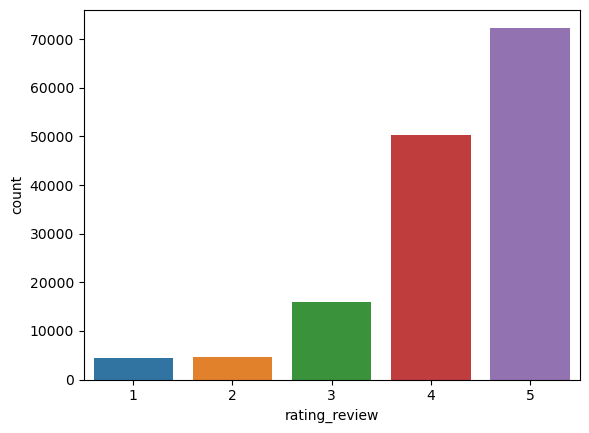

In [101]:
## Data Visualization of Target Variables
sns.countplot(x = 'rating_review', data = trip)
plt.xlabel('rating_review')

plt.show()

In [102]:
trip.rating_review.value_counts()

5    72389
4    50248
3    15935
2     4552
1     4455
Name: rating_review, dtype: int64

In [103]:
# here we converted 1 to 3 as negative rating as 0 and 4 & 5 as a postive rating as 1
trip.rating_review.replace({1:0,2:0,3:0,4:1,5:1}, inplace = True) 

In [104]:
trip.rating_review.value_counts()

1    122637
0     24942
Name: rating_review, dtype: int64

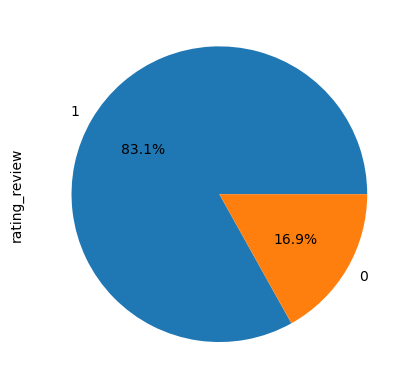

In [105]:
trip.rating_review.value_counts().plot.pie(autopct="%.1f%%");

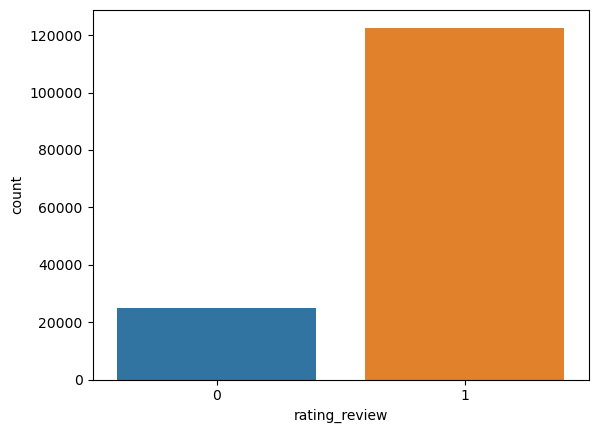

In [106]:
## Data Visualization of Target Variables
sns.countplot(x = 'rating_review', data = trip)
plt.xlabel('rating_review')

plt.show()

# Pre-Processing

In [107]:
trip.review_full = trip.review_full.str.lower() # we lowercase to reduce the size of vocabulary 

In [108]:
trip.review_full

0         totally in love with the auro of the place, re...
1         i went this bar 8 days regularly with my husba...
2         we were few friends and was a birthday celebra...
3         fatjar cafe and market is the perfect place fo...
4         hey guys, if you are craving for pizza and sea...
                                ...                        
147576    near by airport very calm and cool environment...
147577    my favourite place to stay. great service. ash...
147578    good food with nice decoration, drinks list al...
147579    near to airport .it is fine property.  staff i...
147580    amazing food ..  excellent ambience ..  great ...
Name: review_full, Length: 147579, dtype: object

In [109]:
trip.head()

,rating_review,review_full
0,1,"totally in love with the auro of the place, re..."
1,1,i went this bar 8 days regularly with my husba...
2,1,we were few friends and was a birthday celebra...
3,1,fatjar cafe and market is the perfect place fo...
4,1,"hey guys, if you are craving for pizza and sea..."


In [110]:
#Need to remove the stop words from the sentences since they do not hold any essential meaning. 
#Stop words are words like the, an, was, is, etc. This will reduce the number of features. 
#We will import the stopwords from nltk library -

In [111]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer #Stemming is the process of reducing the words to their root form.
# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stopword_list = set(stopwords.words('english'))
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\barsi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\barsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\barsi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\barsi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [112]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [113]:
stopword_list=list(stopwords.words('english'))

## Removing url, Punctuation, Remove Number,Stop Words, Strip extra whitespace ,Applying lemmatizer,stemming

In [114]:
def text_process(mess):
    """
    1. remove the punctuation
    2. remove the URLs
    3. remove the stopwords
    4. lemmatize the words
    5. stem the words
    6. return the list of clean text words
    """
    # Remove punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # Remove URLs
    nopunc = re.sub(r'((www.[^s]+)|(https?://[^s]+))', ' ', nopunc)
    
    # Remove numbers
    nopunc = re.sub(r'\d+', '', nopunc)
    
    # Tokenize words
    word_tokens = nltk.tokenize.WhitespaceTokenizer().tokenize(nopunc)
    
    # Remove stopwords, lemmatize, and stem
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    clean_words = [stemmer.stem(lemmatizer.lemmatize(word.lower())) for word in word_tokens if word.lower() not in stopword_list]
    
    return clean_words

In [115]:
trip["clean_review"]= trip.review_full.apply(text_process)

In [116]:
trip

,rating_review,review_full,clean_review
0,1,"totally in love with the auro of the place, re...","[total, love, auro, place, realli, beauti, qui..."
1,1,i went this bar 8 days regularly with my husba...,"[went, bar, day, regularli, husband, fulli, sa..."
2,1,we were few friends and was a birthday celebra...,"[friend, birthday, celebr, food, good, tast, r..."
3,1,fatjar cafe and market is the perfect place fo...,"[fatjar, cafe, market, perfect, place, casual,..."
4,1,"hey guys, if you are craving for pizza and sea...","[hey, guy, crave, pizza, search, visit, cafe, ..."
...,...,...,...
147576,1,near by airport very calm and cool environment...,"[near, airport, calm, cool, environmentveri, n..."
147577,1,my favourite place to stay. great service. ash...,"[favourit, place, stay, great, servic, ashish,..."
147578,1,"good food with nice decoration, drinks list al...","[good, food, nice, decor, drink, list, alot, c..."
147579,1,near to airport .it is fine property. staff i...,"[near, airport, fine, properti, staff, warm, f..."


# Term Document Matrix

In [117]:
#Now we need to vectorize it. We will do it in the same way, that is using countvectorizer -
from sklearn.feature_extraction.text import CountVectorizer 

In [118]:
mess_transformer=CountVectorizer(analyzer=text_process).fit(trip.review_full)

In [119]:
tdm = mess_transformer.transform(trip.review_full)

In [120]:
tdm.shape

(147579, 118985)

In [121]:
type(tdm)

scipy.sparse._csr.csr_matrix

# Word Cloud 

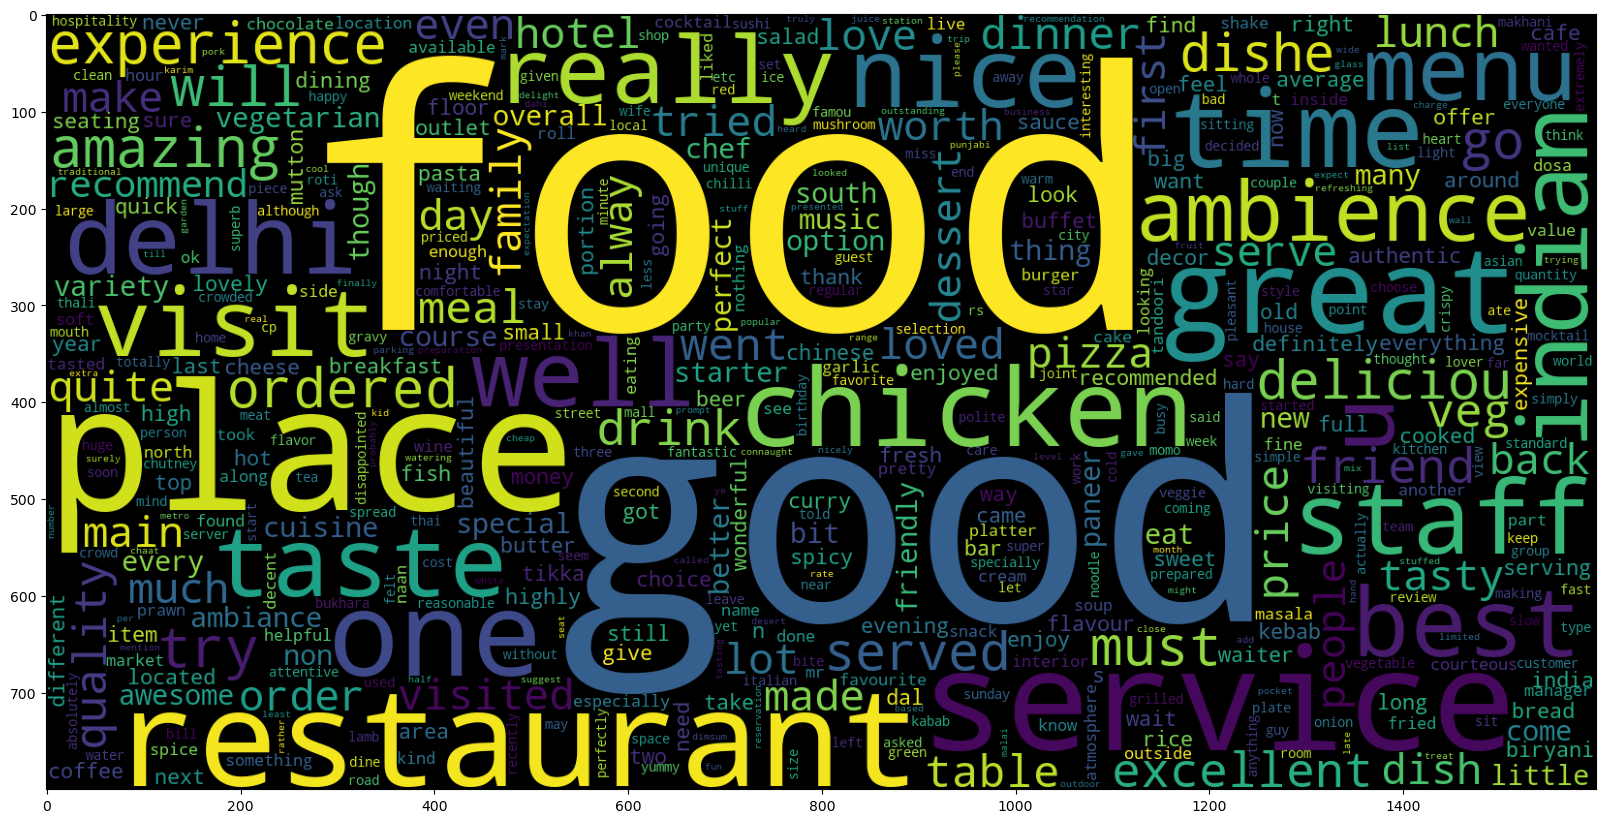

In [122]:
df = trip["review_full"]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(df))
plt.imshow(wc)

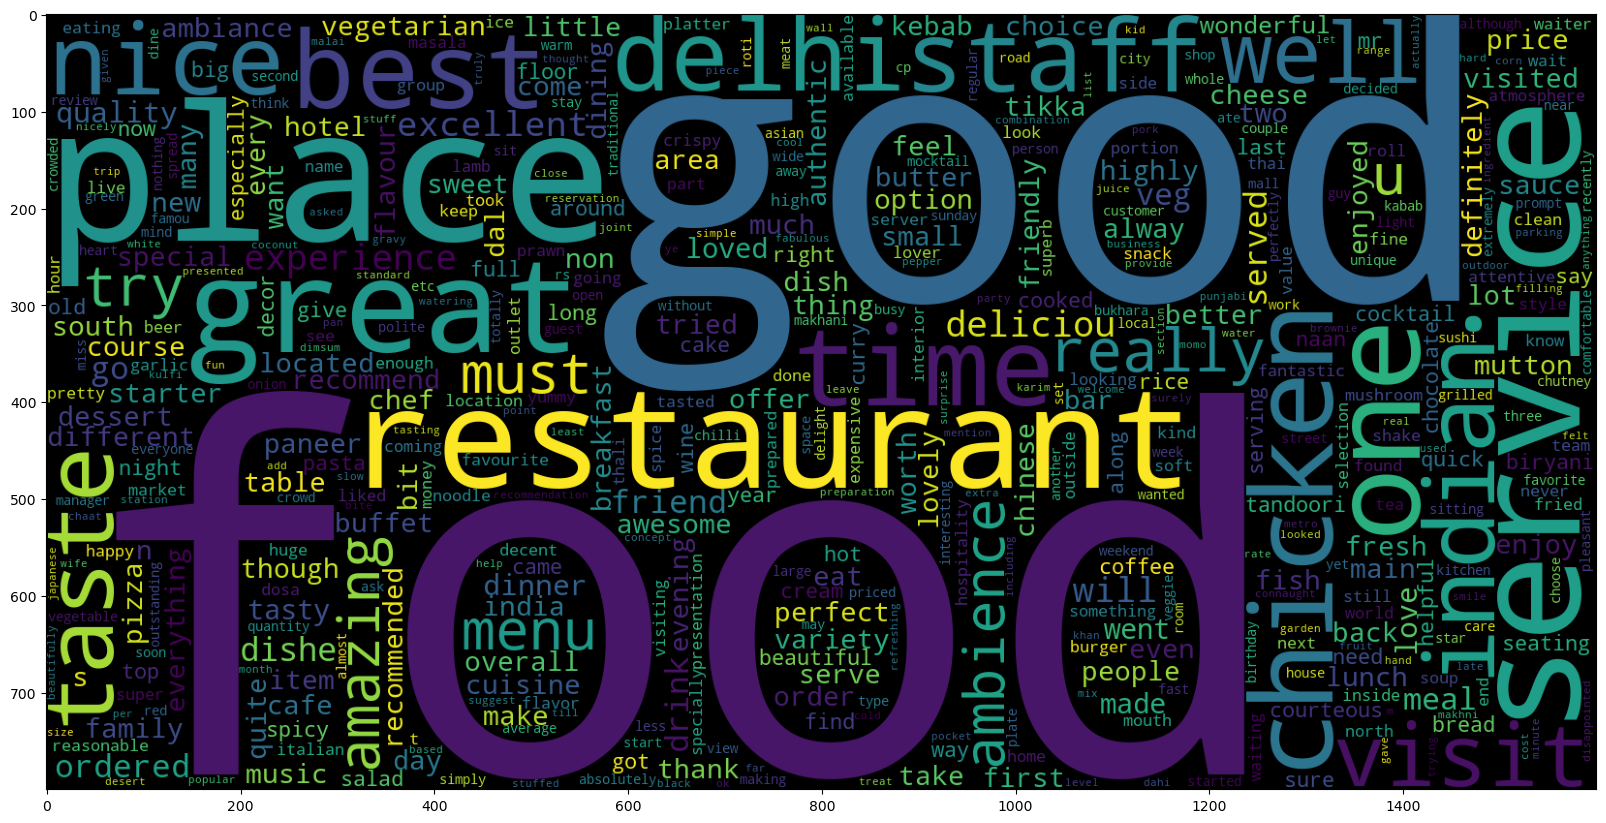

In [123]:
texts_postive_sentiments = trip[trip['rating_review'] == 1]['review_full']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(texts_postive_sentiments))
plt.imshow(wc)

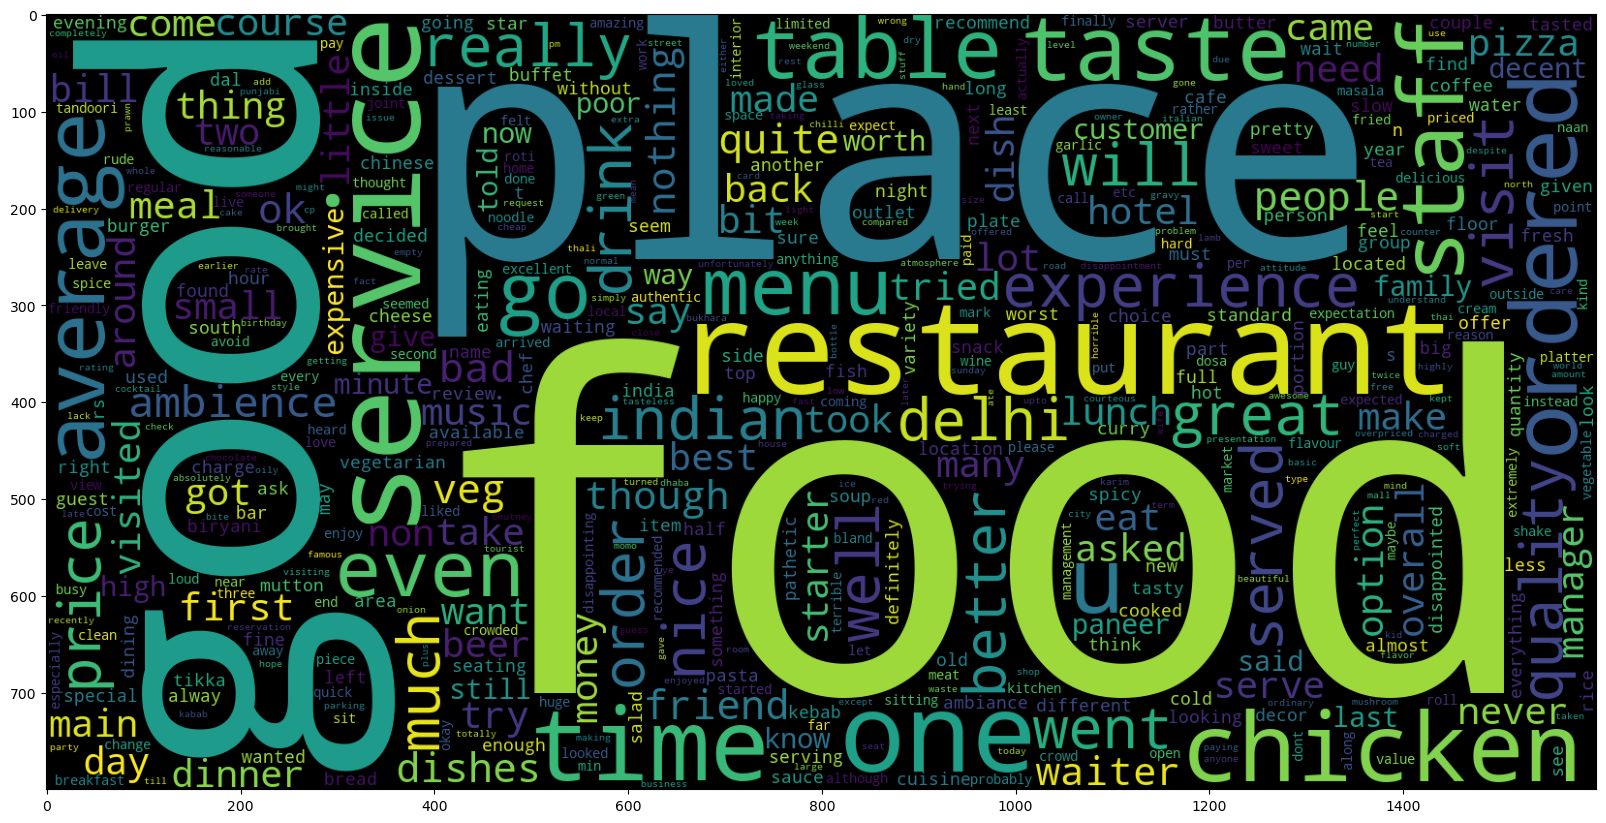

In [124]:
texts_negative_sentiments = trip[trip['rating_review'] == 0]['review_full']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(texts_negative_sentiments))
plt.imshow(wc)

# Sampling

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x_train,x_test,y_train,y_test=train_test_split(tdm,trip.rating_review,test_size=.2) # random sampling 

In [127]:
x_train.shape

(118063, 118985)

In [128]:
y_train.shape

(118063,)

 # Model Building

# MultinomialNB 

In [129]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report
nb=MultinomialNB()
nb.fit(x_train,y_train)
pred_nb=nb.predict(x_test)
tab_nb=confusion_matrix(y_test,pred_nb)
tab_nb

array([[ 3268,  1822],
       [ 1447, 22979]], dtype=int64)

In [130]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.69      0.64      0.67      5090
           1       0.93      0.94      0.93     24426

    accuracy                           0.89     29516
   macro avg       0.81      0.79      0.80     29516
weighted avg       0.89      0.89      0.89     29516



In [131]:
accuracy_score(y_test,pred_nb)*100

88.92465103672585

<AxesSubplot:ylabel='count'>

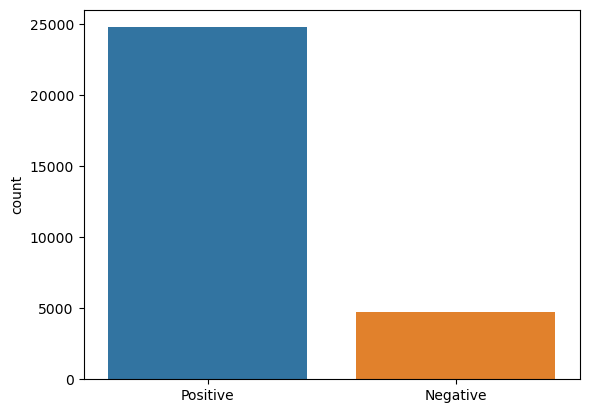

In [132]:
# Sentiment Analysis
sentiment = ['Positive' if pred == 1 else 'Negative' for pred in pred_nb]
sns.countplot(x=sentiment)

# BernoulliNB 

In [133]:
from sklearn.naive_bayes import BernoulliNB
bnb= BernoulliNB()
bnb.fit(x_train, y_train)
pred_bnb=bnb.predict(x_test)
tab=confusion_matrix(y_test,pred_bnb)
tab

array([[ 2412,  2678],
       [ 1541, 22885]], dtype=int64)

In [134]:
print(classification_report(y_test, pred_bnb))

              precision    recall  f1-score   support

           0       0.61      0.47      0.53      5090
           1       0.90      0.94      0.92     24426

    accuracy                           0.86     29516
   macro avg       0.75      0.71      0.72     29516
weighted avg       0.85      0.86      0.85     29516



In [135]:
accuracy_score(y_test,pred_bnb)*100

85.70605773139992

# conclusion:
#Over all above models the MultinomialNB model seems to perform well, with high accuracy of 88.62 and reasonably balanced precision and recall for both classes.
#especially in correctly predicting instances of class 1 (Positive class). However, there is some room for improvement in correctly identifying instances of class 0 (Negative class), as indicated by slightly lower precision and recall values for class 0 compared to class 1.

#With this, we have a good result where the model can classify whether the evaluation is positive or negative (considering 3 or below as negative)

# Model Export

In [ ]:
import pickle
with open('trip_adviser_model.pickle','wb') as f:
    pickle.dump(nb,f)

# Tripadvisor Using LSTM

In [ ]:
### Import the basic libraries 

In [137]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

In [138]:
trip= pd.read_csv(r"D:\SUMEDH\Project Datasets\capstone project\New_Delhi_reviews.csv")
trip.head(5) 

,rating_review,review_full
0,5,"Totally in love with the Auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...
2,5,We were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea..."


In [139]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147581 entries, 0 to 147580
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   rating_review  147581 non-null  int64 
 1   review_full    147579 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [140]:
trip.isnull().sum()

rating_review    0
review_full      2
dtype: int64

In [141]:
trip = trip.dropna() 

In [142]:
trip.isnull().sum()

rating_review    0
review_full      0
dtype: int64

In [143]:
trip.shape

(147579, 2)

In [144]:
trip.rating_review.value_counts()

5    72389
4    50248
3    15935
2     4552
1     4455
Name: rating_review, dtype: int64

In [145]:
trip.rating_review.value_counts()

5    72389
4    50248
3    15935
2     4552
1     4455
Name: rating_review, dtype: int64

In [146]:
trip.rating_review.replace({1:0,2:0,3:0,4:1,5:1}, inplace = True) 

In [147]:
trip.rating_review.value_counts()

1    122637
0     24942
Name: rating_review, dtype: int64

In [148]:
trip['rating_review'].unique()

array([1, 0], dtype=int64)

In [149]:
trip.head()

,rating_review,review_full
0,1,"Totally in love with the Auro of the place, re..."
1,1,I went this bar 8 days regularly with my husba...
2,1,We were few friends and was a birthday celebra...
3,1,Fatjar Cafe and Market is the perfect place fo...
4,1,"Hey Guys, if you are craving for pizza and sea..."


In [150]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [151]:
review = np.array(trip['review_full'])
rating = np.array(trip['rating_review'])

In [152]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(review, rating, test_size=0.2, random_state=42)

In [153]:
y_train = to_categorical(y_train)

In [154]:
max_num_words  = 10000 #total how many words to be considered from the corpus(collection of documents)
seq_len        = 50    #how many words to be taken from each document
embedding_size = 100

In [155]:
tokenizer = Tokenizer(num_words = max_num_words)
tokenizer.fit_on_texts(review)
x_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(x_train, maxlen = seq_len)

In [156]:
x_train.shape

(118063, 50)

In [157]:
x_train[3]

array([   0,    0,    0,    0,   71,   67,   12,    1, 5984,  397,    9,
       3304,    3,  502,   11,   88,  558, 3240,  123,  202,   30,  540,
         87,  383,   26,  138,  202,   84,  202, 7146,  378,   10,   63,
        149,  255,    4,    1,  343,  122,  279,  410,    6,  163,  209,
          4,   81,  531,  362,   13,   93])

In [158]:
model = Sequential()  # iniitialize the network
model.add(Embedding( input_dim = max_num_words,    
                     input_length = seq_len,
                     output_dim = embedding_size))
model.add(LSTM(5))   #If we want to perform RNN then simply replace LSTM to RNN but recommended
model.add(Dense(2 , activation  = 'softmax'))   # final layer
from tensorflow.keras.optimizers import Adam
adam = Adam(lr = .001)
model.compile(optimizer= adam , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [159]:
model.fit(x_train, y_train, epochs=5, batch_size = 32, validation_split=.2)

Epoch 1/5
2952/2952 [==============================] - 70s 23ms/step - loss: 0.2778 - accuracy: 0.8893 - val_loss: 0.2450 - val_accuracy: 0.9073
Epoch 2/5
2952/2952 [==============================] - 68s 23ms/step - loss: 0.2101 - accuracy: 0.9187 - val_loss: 0.2403 - val_accuracy: 0.9062
Epoch 3/5
2952/2952 [==============================] - 68s 23ms/step - loss: 0.1794 - accuracy: 0.9315 - val_loss: 0.2600 - val_accuracy: 0.9030
Epoch 4/5
2952/2952 [==============================] - 67s 23ms/step - loss: 0.1545 - accuracy: 0.9418 - val_loss: 0.2717 - val_accuracy: 0.8972
Epoch 5/5
2952/2952 [==============================] - 69s 23ms/step - loss: 0.1331 - accuracy: 0.9504 - val_loss: 0.2976 - val_accuracy: 0.8969


In [160]:
x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, maxlen=seq_len)

In [161]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [162]:
pred_prob = model.predict(x_test)

923/923 [==============================] - 3s 3ms/step


In [163]:
pred_classes = pred_prob.argmax(axis = 1)

In [164]:
tab1 = confusion_matrix(y_test, pred_classes)
tab1

array([[ 3242,  1759],
       [ 1243, 23272]], dtype=int64)

In [166]:
Accuracy= tab1.diagonal().sum()*100/tab1.sum()
Accuracy

89.82924515517007